# actual lab

0.0002660910863249058
thicnkess of page is: 0.05787 +/- 0.00027 mm


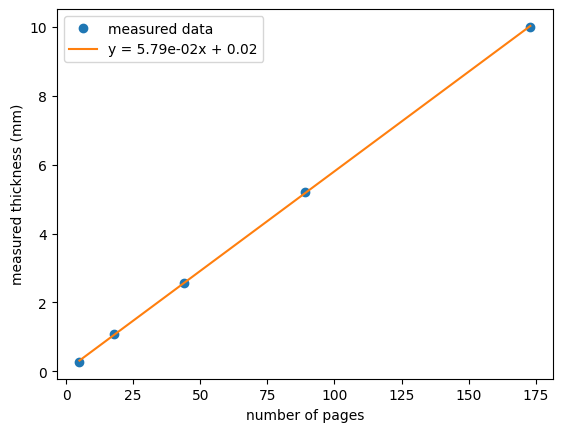

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'X': [5, 18, 44, 89, 173],
    'Y': [0.27, 1.08, 2.57, 5.21, 10.01]
}

data = pd.DataFrame(data)

data['average'] = data['Y'] / data['X']

data['error in average'] = 0.01 / data['X']


p, V = np.polyfit(data['X'], data['Y'], 1, cov=True)
m, b = p

mpages = m

slope_error = np.sqrt(V[0][0])
# print(m)
print(slope_error)
print(f'thicnkess of page is: {m:.5f} +/- {slope_error:.5f} mm')

residuals = data['Y'] - (m*data['X'] + b)

plt.plot(data['X'], data['Y'], 'o', label='measured data')
plt.plot(data['X'], m*np.array(data['X']) + b, label=f'y = {m:.2e}x + {b:.2f}')
plt.xlabel('number of pages')
plt.ylabel('measured thickness (mm)')
plt.legend()

In [2]:
print(4*m)
print(4*slope_error)

print(f'{4*m:.4f} +/- {4*slope_error:.4f} mm')

0.23149014431919
0.0010643643452996232
0.2315 +/- 0.0011 mm


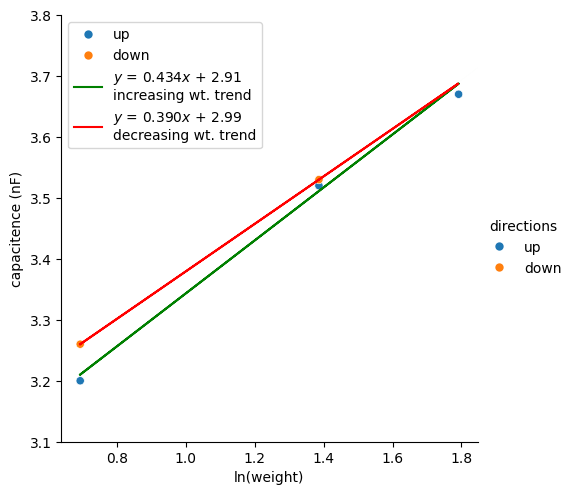

In [3]:

weight = np.array([2, 4, 6, 4, 2])
capacitence = np.array([ 3.20, 3.52, 3.67, 3.53, 3.26])
directions = pd.Series(['up', 'up', 'up', 'down', 'down'])
lncap = np.log(capacitence)
lnweight = np.log(weight)

# make dataframe pandas
data = pd.DataFrame({
    'weight': weight,
    'capacitence': capacitence,
    'lnweight': lnweight,
    'lncap': lncap,
    'directions': directions
})

# up polynomial fit
m,b = np.polyfit(lnweight[:4], capacitence[:4], 1, cov=False)

# plt.plot(lnweight, capacitence, 'o', label='measured data')
sns.relplot(x='lnweight', y='capacitence', data=data, hue='directions')
plt.plot(lnweight, m*lnweight + b, label=f'$y$ = {m:.3f}$x$ + {b:.2f}\nincreasing wt. trend', color='green')

# down polynomial fit
m,b = np.polyfit(lnweight[3:], capacitence[3:], 1, cov=False)
plt.plot(lnweight, m*lnweight + b, label=f'$y$ = {m:.3f}$x$ + {b:.2f}\ndecreasing wt. trend', color='red')

#close the top of the axis
plt.ylim(3.1, 3.8)
plt.xlabel('ln(weight)')
plt.ylabel('capacitence (nF)')
plt.legend()

slope error: 2.416e-14
slope: 6.348e-13
calc K: 2.4161


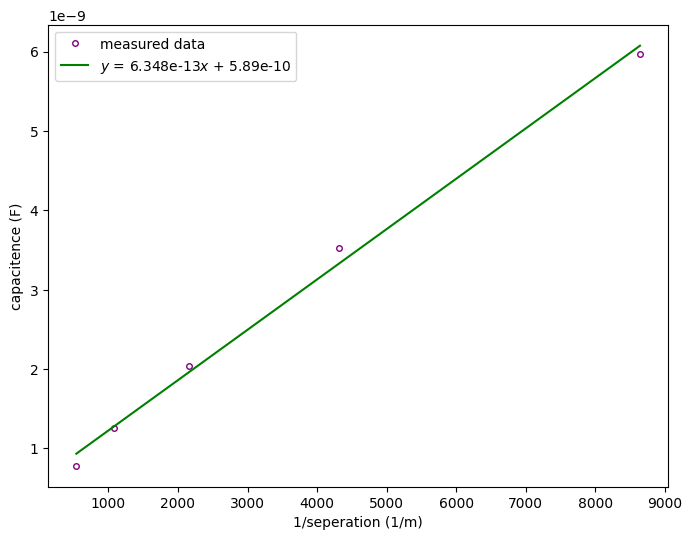

In [4]:
pages = np.array([2**i for i in range (1, 6)])
seperation = mpages * pages
capacitence = np.array([5.97, 3.52, 2.04, 1.26, 0.78])

x = (seperation * 1e-3)**-1
y = capacitence * 1e-9

p, V = np.polyfit(x, y, 1, cov=True)
m,b = p

slope_error = np.sqrt(V[0][0])
print(f'slope error: {slope_error:.3e}')
print(f'slope: {m:.3e}')

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, 'o', label='measured data', color='purple', markersize=4, fillstyle='none')
ax.plot(x, m*x + b, label=f'$y$ = {m:.3e}$x$ + {b:.2e}', color='green')
ax.set_xlabel('1/seperation (1/m)')
ax.set_ylabel('capacitence (F)')
ax.legend()

A = 0.1960 * 0.1514
epsilon = 8.854e-12
K = m / (A * epsilon)
print(f'calc K: {K:.4f}')


### prelab sketches

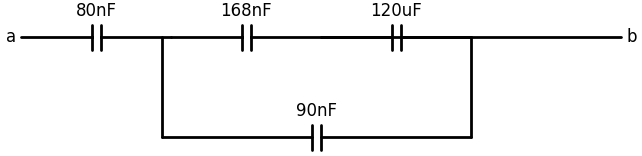

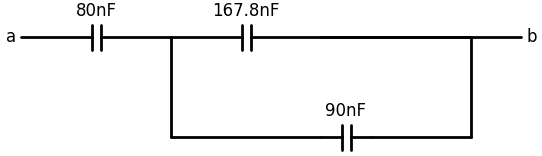

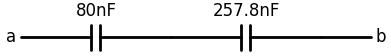

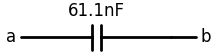

In [5]:
import schemdraw
import schemdraw.elements as elm

# one capacitor in series with two capaciors in parallel
with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    C0 = elm.Capacitor().label('80nF').right().label('a', 'left')
    C1 = elm.Capacitor().label('168nF')
    C2 = elm.Capacitor().label('120uF')
    # other branch
    d.add(elm.Line().right().at(C1.end))
    d.add(elm.Line().down().length(2))
    d.add(elm.Line().left().length(3))
    d.add(elm.Capacitor().label('90nF').left().length(-2))
    d.add(elm.Line().left().length(3))
    d.add(elm.Line().up().length(2))

    d.add(elm.Line().right().at(C2.end).label('b', 'right')).idot()

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    C0 = elm.Capacitor().label('80nF').right().label('a', 'left')
    C1 = elm.Capacitor().label('167.8nF')
    # other branch
    d.add(elm.Line().right().at(C1.end))
    d.add(elm.Line().down().length(2))
    d.add(elm.Line().left().length(2))
    d.add(elm.Capacitor().label('90nF').left().length(1))
    d.add(elm.Line().left().length(3))
    d.add(elm.Line().up().length(2))

    d.add(elm.Line().right().length(4).at(C1.end).label('b', 'right')).idot()

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    C0 = elm.Capacitor().label('80nF').right().label('a', 'left')
    C1 = elm.Capacitor().label('257.8nF')

    d.add(elm.Line().right().length(1).at(C1.end).label('b', 'right')).idot()

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    C0 = elm.Capacitor().label('61.1nF').right().label('a', 'left')
    d.add(elm.Line().right().length(0.5).at(C0.end).label('b', 'right')).idot()